In [1]:
#Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium 
import seaborn as sns 
import pycountry_convert as pyc
import datetime as dt 
import plotly.express as px
import calmap
%matplotlib inline


# Data Inspection

In [2]:
#Read in dataset by countries 
covid19_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

covid19_country.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2021-10-22 06:21:25,33.93911,67.709953,155891,7249,NaN,NaN,400.456315,NaN,NaN,4.650044,4,AFG,1091,50
1,Albania,2021-10-22 06:21:25,41.15330,20.168300,180029,2855,NaN,NaN,6255.785670,NaN,NaN,1.585856,8,ALB,14165,246
2,Algeria,2021-10-22 06:21:25,28.03390,1.659600,205599,5881,NaN,NaN,468.857719,NaN,NaN,2.860422,12,DZA,3316,133
3,Andorra,2021-10-22 06:21:25,42.50630,1.521800,15382,130,NaN,NaN,19908.108458,NaN,NaN,0.845144,20,AND,226,0
4,Angola,2021-10-22 06:21:25,-11.20270,17.873900,63567,1685,NaN,NaN,193.411068,NaN,NaN,2.650746,24,AGO,9727,225


In [3]:
covid19_country.dtypes

Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered              float64
Active                 float64
Incident_Rate          float64
People_Tested          float64
People_Hospitalized    float64
Mortality_Rate         float64
UID                      int64
ISO3                    object
Cases_28_Days            int64
Deaths_28_Days           int64
dtype: object

In [4]:
#Read the data files 

confirmed_df = pd.read_csv('Resources/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('Resources/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('Resources/time_series_covid19_recovered_global.csv')

#Examine the head of each file 
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [5]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,3,3,3,6,8,12
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [6]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,5
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,10,17,17,31,31,33,44,52
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,65,24,65,29,29,31,31,37,46
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])


global_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index()

global_data['Last_Update'] = pd.to_datetime(global_data['Last_Update']).dt.strftime('%m/%d/%Y')
global_data.head()

/home/sushant/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_12275/1979704311.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  global_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index()


,Last_Update,Country_Region,Confirmed,Deaths
0,01/22/2020,Afghanistan,0,0
1,01/22/2020,Albania,0,0
2,01/22/2020,Algeria,0,0
3,01/22/2020,Andorra,0,0
4,01/22/2020,Angola,0,0


In [9]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124605 entries, 0 to 124604
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Last_Update     124605 non-null  object
 1   Country_Region  124605 non-null  object
 2   Confirmed       124605 non-null  int64 
 3   Deaths          124605 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


In [10]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79 non-null     object 
 1   Country/Region  256 non-null    object 
 2   Lat             256 non-null    float64
 3   Long            256 non-null    float64
 4   1/22/20         256 non-null    int64  
 5   1/23/20         256 non-null    int64  
 6   1/24/20         256 non-null    int64  
 7   1/25/20         256 non-null    int64  
 8   1/26/20         256 non-null    int64  
 9   1/27/20         256 non-null    int64  
 10  1/28/20         256 non-null    int64  
 11  1/29/20         256 non-null    int64  
 12  1/30/20         256 non-null    int64  
 13  1/31/20         256 non-null    int64  
 14  2/1/20          256 non-null    int64  
 15  2/2/20          256 non-null    int64  
 16  2/3/20          256 non-null    int64  
 17  2/4/20          256 non-null    int

In [11]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79 non-null     object 
 1   Country/Region  256 non-null    object 
 2   Lat             256 non-null    float64
 3   Long            256 non-null    float64
 4   1/22/20         256 non-null    int64  
 5   1/23/20         256 non-null    int64  
 6   1/24/20         256 non-null    int64  
 7   1/25/20         256 non-null    int64  
 8   1/26/20         256 non-null    int64  
 9   1/27/20         256 non-null    int64  
 10  1/28/20         256 non-null    int64  
 11  1/29/20         256 non-null    int64  
 12  1/30/20         256 non-null    int64  
 13  1/31/20         256 non-null    int64  
 14  2/1/20          256 non-null    int64  
 15  2/2/20          256 non-null    int64  
 16  2/3/20          256 non-null    int64  
 17  2/4/20          256 non-null    int

In [12]:
recovered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  64 non-null     object 
 1   Country/Region  242 non-null    object 
 2   Lat             242 non-null    float64
 3   Long            242 non-null    float64
 4   1/22/20         242 non-null    int64  
 5   1/23/20         242 non-null    int64  
 6   1/24/20         242 non-null    int64  
 7   1/25/20         242 non-null    int64  
 8   1/26/20         242 non-null    int64  
 9   1/27/20         242 non-null    int64  
 10  1/28/20         242 non-null    int64  
 11  1/29/20         242 non-null    int64  
 12  1/30/20         242 non-null    int64  
 13  1/31/20         242 non-null    int64  
 14  2/1/20          242 non-null    int64  
 15  2/2/20          242 non-null    int64  
 16  2/3/20          242 non-null    int64  
 17  2/4/20          242 non-null    int

# Data Preprocessing

In [13]:
# Let rename the columns for consistency
confirmed_df = confirmed_df.rename(columns={'Province/State': 'State',
                                            'Country/Region': 'Country'})
death_df = death_df.rename(columns={'Province/State': 'State',
                                            'Country/Region': 'Country'})

covid19_country = covid19_country.rename(columns={'Country_Region': 'Country'})                                            

In [14]:
#Some values were not calculated in the Active column

covid19_country['Active'] = covid19_country['Confirmed'] - covid19_country['Deaths']- covid19_country['Recovered']
covid19_country.head()

,Country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2021-10-22 06:21:25,33.93911,67.709953,155891,7249,NaN,NaN,400.456315,NaN,NaN,4.650044,4,AFG,1091,50
1,Albania,2021-10-22 06:21:25,41.15330,20.168300,180029,2855,NaN,NaN,6255.785670,NaN,NaN,1.585856,8,ALB,14165,246
2,Algeria,2021-10-22 06:21:25,28.03390,1.659600,205599,5881,NaN,NaN,468.857719,NaN,NaN,2.860422,12,DZA,3316,133
3,Andorra,2021-10-22 06:21:25,42.50630,1.521800,15382,130,NaN,NaN,19908.108458,NaN,NaN,0.845144,20,AND,226,0
4,Angola,2021-10-22 06:21:25,-11.20270,17.873900,63567,1685,NaN,NaN,193.411068,NaN,NaN,2.650746,24,AGO,9727,225


In [15]:
#Examined the data to find inconsistencies in several country names. Need to modify fit the documentation https://pypi.org/project/pycountry/ 
#Change US to USA 
confirmed_df.loc[confirmed_df['Country'] == 'US', 'Country'] = 'USA'
death_df.loc[death_df['Country'] == 'US', 'Country'] = 'USA'
covid19_country.loc[covid19_country['Country'] == 'US', 'Country'] = 'USA'

#Congo (Brazzaville) to Democratic Republic of Congo 
confirmed_df.loc[confirmed_df['Country'] == 'Congo (Brazzaville)', 'Country'] = 'Democratic Republic of Congo'
death_df.loc[death_df['Country'] == 'Congo (Brazzaville)', 'Country'] = 'Democratic Republic of Congo'
covid19_country.loc[covid19_country['Country'] == 'Congo (Brazzaville)', 'Country'] = 'Democratic Republic of Congo'

#Congo (Kinshasa) to Democratic Republic of Congo 
confirmed_df.loc[confirmed_df['Country'] == 'Congo (Kinshasa)', 'Country'] = 'Democratic Republic of Congo'
death_df.loc[death_df['Country'] == 'Congo (Kinshasa)', 'Country'] = 'Democratic Republic of Congo'
covid19_country.loc[covid19_country['Country'] == 'Congo (Kinshasa)', 'Country'] = 'Democratic Republic of Congo'


#Change Korea, South to South Korea 
confirmed_df.loc[confirmed_df['Country'] == 'Korea, South', 'Country'] = 'South Korea'
death_df.loc[death_df['Country'] == 'Korea, South', 'Country'] = 'South Korea'
covid19_country.loc[covid19_country['Country'] == 'Korea, South', 'Country'] = 'South Korea'

#Remove the asterick from Taiwan* 
confirmed_df.loc[confirmed_df['Country'] == 'Taiwan*', 'Country'] = 'Taiwan'
death_df.loc[death_df['Country'] == 'Taiwan*', 'Country'] = 'Taiwan'
covid19_country.loc[covid19_country['Country'] == 'Taiwan*', 'Country'] = 'Taiwan'

In [16]:
#Double Check to ensure changes 
death_df.loc[death_df['Country'] == 'USA']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
225,NaN,USA,37.0902,-95.7129,0,0,0,0,0,0,...,417,557,706,942,1209,1581,2026,2467,2978,3873


In [17]:
#Double Check to ensure changes 
death_df.loc[death_df['Country'] == 'Taiwan']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
207,NaN,Taiwan,23.7,121.0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,5,5


In [18]:
#pycountry provides the ISO databases for the standards countries 
confirmed_countries = np.asarray(confirmed_df['Country'])
death_countries = np.asarray(death_df['Country'])
global_countries = np.asarray(covid19_country['Country'])

#Match the continent code to the names 
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [19]:
#Define a function to get the code for each country 
def country_to_continent(country):
    try:
        return pyc.country_alpha2_to_continent_code(pyc.country_name_to_country_alpha2(country))
    except:
        return 'na'


In [20]:
# Collecting Continent Information

confirmed_df.insert(2,"Continent", [continents[country_to_continent(country)] for country in confirmed_countries[:]])
death_df.insert(2,"Continent",  [continents[country_to_continent(country)] for country in death_countries[:]])
covid19_country.insert(2,"Continent",  [continents[country_to_continent(country)] for country in global_countries[:]])

In [21]:
#Let check how many countries fall under the Others category
death_df[death_df['Continent'] == 'Others']

,State,Country,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
83,NaN,Democratic Republic of Congo,Others,-4.038300,21.758700,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,NaN,Democratic Republic of Congo,Others,-4.038300,21.758700,0,0,0,0,0,...,1,1,2,2,3,3,6,6,8,8
86,NaN,Cote d'Ivoire,Others,7.540000,-5.547100,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
88,NaN,Diamond Princess,Others,0.000000,0.000000,0,0,0,0,0,...,8,8,10,10,10,10,10,10,10,10
127,NaN,Holy See,Others,41.902900,12.453400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,NaN,Timor-Leste,Others,-8.874217,125.727539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,NaN,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
247,NaN,Kosovo,Others,42.602636,20.902977,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
248,NaN,Burma,Others,21.916200,95.956000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
252,NaN,MS Zaandam,Others,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Looks like Democractic of Congo has two entries, drop index 83 since all zeros 

death_df = death_df.drop(index=83, axis=1)

In [23]:
death_df[death_df['Continent'] == 'Others']

,State,Country,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
84,NaN,Democratic Republic of Congo,Others,-4.038300,21.758700,0,0,0,0,0,...,1,1,2,2,3,3,6,6,8,8
86,NaN,Cote d'Ivoire,Others,7.540000,-5.547100,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
88,NaN,Diamond Princess,Others,0.000000,0.000000,0,0,0,0,0,...,8,8,10,10,10,10,10,10,10,10
127,NaN,Holy See,Others,41.902900,12.453400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,NaN,Timor-Leste,Others,-8.874217,125.727539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,NaN,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
247,NaN,Kosovo,Others,42.602636,20.902977,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
248,NaN,Burma,Others,21.916200,95.956000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
252,NaN,MS Zaandam,Others,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
confirmed_df[confirmed_df['Country'] == 'Democratic Republic of Congo']

,State,Country,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
83,NaN,Democratic Republic of Congo,Others,-4.0383,21.7587,0,0,0,0,0,...,3,4,4,4,4,4,4,19,19,19
84,NaN,Democratic Republic of Congo,Others,-4.0383,21.7587,0,0,0,0,0,...,30,36,45,48,51,51,65,65,81,98


In [25]:

confirmed_df = confirmed_df.drop(index=83, axis=1)

# Data Analysis

In [26]:
#Chart global reported cases since 4/1/2020

clean_covid19 = covid19_country.copy().drop(['Continent','Country','Last_Update','Lat', 'Long_'], axis= 1)

global_cases_overview = pd.DataFrame(clean_covid19.sum())

global_cases_overview = global_cases_overview.rename(columns={0: 'Global COVID-19 Cases'})

global_cases_overview.style.background_gradient(cmap='rainbow')

/tmp/ipykernel_12275/1858270355.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  global_cases_overview = pd.DataFrame(clean_covid19.sum())


,Global COVID-19 Cases
Confirmed,242501427.000000
Deaths,4929826.000000
Recovered,0.000000
Active,0.000000
Incident_Rate,958375.619847
People_Tested,0.000000
People_Hospitalized,0.000000
Mortality_Rate,432.706350
UID,102385.000000
Cases_28_Days,11875623.000000


In [28]:
continent_overview = covid19_country.drop(['Last_Update','Lat', 'Long_'], axis=1)
continent_overview = continent_overview.groupby(['Continent']).sum()
continent_overview.style.background_gradient(cmap= 'Blues', subset=['Confirmed']).background_gradient(cmap= 'OrRd', subset=['Deaths']).background_gradient(cmap= 'Greens', subset=['Recovered']).background_gradient(cmap= 'Purples', subset=['Active'])


,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Cases_28_Days,Deaths_28_Days
Continent,,,,,,,,,,,
Africa,8319748,214384,0.000000,0.000000,83943.208895,0.000000,0.000000,115.521649,24022,238688,8551
Asia,77523093,1136630,0.000000,0.000000,214684.993603,0.000000,0.000000,85.946224,18454,3480594,45199
Australia,238621,2632,0.000000,0.000000,6868.943202,0.000000,0.000000,29.064570,4998,70289,592
Europe,62508587,1273357,0.000000,0.000000,423634.370289,0.000000,0.000000,76.923151,18538,4239044,61525
North America,54469485,1108783,0.000000,0.000000,119168.342472,0.000000,0.000000,49.444601,8292,3164717,65910
Others,1258465,28197,0.000000,0.000000,24023.331929,0.000000,0.000000,35.771170,23373,102073,1986
South America,38183428,1165843,0.000000,0.000000,86052.429455,0.000000,0.000000,40.034984,4708,580218,16049


In [29]:
#Let examine the cases by top 10 countries by number of confirmed cases 
countries_overview = covid19_country.drop(['Last_Update', 'Continent','Lat', 'Long_'], axis=1)
# countries_overview[:20].sort_values('Confirmed', ascending=False).style.background_gradient(cmap='YlOrRd')
countries_overview.sort_values('Confirmed', ascending=False)[:10].set_index('Country').style.background_gradient(cmap= 'Blues', subset=['Confirmed']).background_gradient(cmap= 'OrRd', subset=['Deaths']).background_gradient(cmap= 'Greens', subset=['Recovered']).background_gradient(cmap= 'Purples', subset=['Active'])


/home/sushant/.local/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/sushant/.local/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
Country,,,,,,,,,,,,
USA,45300999,733217,nan,nan,13749.813361,nan,nan,1.618545,840,USA,2625051,47978
India,34143236,453042,nan,nan,2474.139675,nan,nan,1.326887,356,IND,532647,6443
Brazil,21697341,604679,nan,nan,10207.659638,nan,nan,2.786881,76,BRA,389163,11715
United Kingdom,8681795,139562,nan,nan,12788.784858,nan,nan,1.607525,826,GBR,1080197,3406
Russia,8005376,223331,nan,nan,5485.596754,nan,nan,2.789763,643,RUS,756804,25497
Turkey,7772574,68472,nan,nan,9215.864340,nan,nan,0.880944,792,TUR,812307,5948
France,7209209,118344,nan,nan,11044.616383,nan,nan,1.641567,250,FRA,140496,1277
Iran,5833525,124763,nan,nan,6945.255276,nan,nan,2.138724,364,IRN,339934,6255
Argentina,5277525,115796,nan,nan,11677.031241,nan,nan,2.194135,32,ARG,30527,1024


In [30]:
#Let examine the cases by top 10 countries by number of deaths
countries_overview.sort_values('Deaths', ascending=False)[:10].set_index('Country').style.background_gradient(cmap= 'Blues', subset=['Confirmed']).background_gradient(cmap= 'OrRd', subset=['Deaths']).background_gradient(cmap= 'Greens', subset=['Recovered']).background_gradient(cmap= 'Purples', subset=['Active'])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
Country,,,,,,,,,,,,
USA,45300999,733217,nan,nan,13749.813361,nan,nan,1.618545,840,USA,2625051,47978
Brazil,21697341,604679,nan,nan,10207.659638,nan,nan,2.786881,76,BRA,389163,11715
India,34143236,453042,nan,nan,2474.139675,nan,nan,1.326887,356,IND,532647,6443
Mexico,3772556,285669,nan,nan,2952.099941,nan,nan,7.572293,484,MEX,163580,11530
Russia,8005376,223331,nan,nan,5485.596754,nan,nan,2.789763,643,RUS,756804,25497
Peru,2192205,199945,nan,nan,6648.717818,nan,nan,9.120725,604,PER,21730,789
Indonesia,4237834,143120,nan,nan,1549.348456,nan,nan,3.377197,360,IDN,36275,2006
United Kingdom,8681795,139562,nan,nan,12788.784858,nan,nan,1.607525,826,GBR,1080197,3406
Italy,4729678,131724,nan,nan,7822.585185,nan,nan,2.785052,380,ITA,79772,1173


In [31]:
countries_overview['Mortality Rate %'] = np.round((countries_overview['Deaths']/countries_overview['Confirmed']) * 100, 2)

countries_over_10000 = countries_overview.loc[countries_overview['Confirmed'] > 10000]

countries_over_10000 = countries_over_10000.sort_values('Mortality Rate %', ascending= False)
countries_over_10000 = countries_over_10000.set_index('Country')
# .style.background_gradient(cmap= 'Blues', subset=['Confirmed']).background_gradient(cmap= 'OrRd', subset=['Deaths']).background_gradient(cmap= 'Greens', subset=['Recovered']).background_gradient(cmap= 'Purples', subset=['Active']).background_gradient(cmap= 'Oranges', subset=['Mortality Rate %'])

countries_over_10000

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days,Mortality Rate %
Country,,,,,,,,,,,,,
Peru,2192205,199945,NaN,NaN,6648.717818,NaN,NaN,9.120725,604,PER,21730,789,9.12
Sudan,40084,3038,NaN,NaN,91.413154,NaN,NaN,7.579084,729,SDN,2007,144,7.58
Mexico,3772556,285669,NaN,NaN,2952.099941,NaN,NaN,7.572293,484,MEX,163580,11530,7.57
Ecuador,514087,32937,NaN,NaN,2913.819938,NaN,NaN,6.406892,218,ECU,7067,271,6.41
Syria,40630,2467,NaN,NaN,232.162713,NaN,NaN,6.071868,760,SYR,8889,295,6.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Qatar,238271,608,NaN,NaN,8270.254698,NaN,NaN,0.255172,634,QAT,2255,4,0.26
Iceland,12827,33,NaN,NaN,3758.827839,NaN,NaN,0.257270,352,ISL,1233,0,0.26
Burundi,19867,38,NaN,NaN,167.079017,NaN,NaN,0.191272,108,BDI,3511,0,0.19


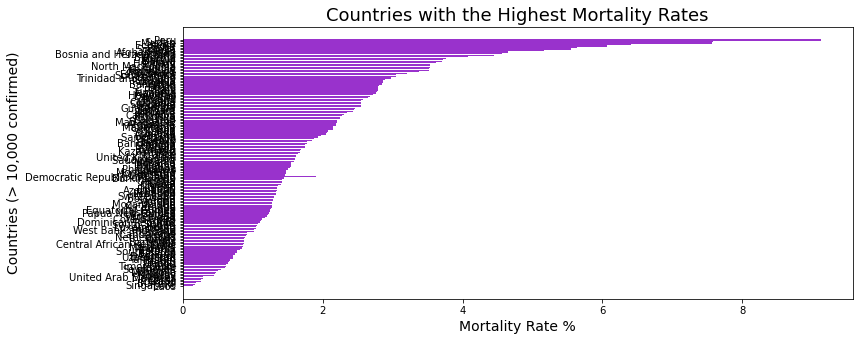

In [32]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot()

plt.barh(countries_over_10000.sort_values('Mortality Rate %')['Mortality Rate %'].index, countries_over_10000.sort_values('Mortality Rate %')['Mortality Rate %'].values, color='darkorchid')
plt.title('Countries with the Highest Mortality Rates', fontsize = 18)
plt.xlabel('Mortality Rate %', fontsize=14)
plt.ylabel('Countries (> 10,000 confirmed)', fontsize=14)


# plt.savefig('Images/countries_high_mort_rate.png')
plt.show()


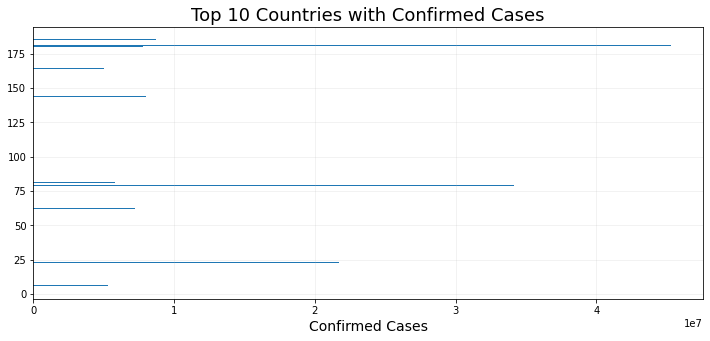

In [33]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot()

plt.barh(countries_overview.sort_values('Confirmed')['Confirmed'].index[-10:], 
         countries_overview.sort_values('Confirmed')['Confirmed'].values[-10:])
plt.xlabel('Confirmed Cases', fontsize=14)
plt.title('Top 10 Countries with Confirmed Cases', fontsize=18)
plt.grid(alpha=0.2)
# plt.savefig('Images/top10confirmed.png')
plt.show()

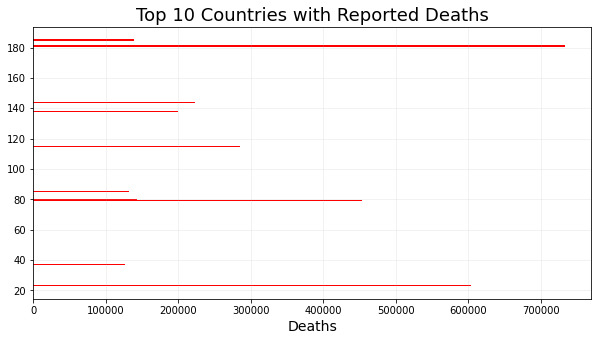

In [34]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot()

plt.barh(countries_overview.sort_values('Deaths')['Deaths'].index[-10:], 
         countries_overview.sort_values('Deaths')['Deaths'].values[-10:], color='Red')
plt.xlabel('Deaths', fontsize=14)
plt.title('Top 10 Countries with Reported Deaths', fontsize=18)
plt.grid(alpha=0.2)
# plt.savefig('Images/top10deaths.png')
plt.show()

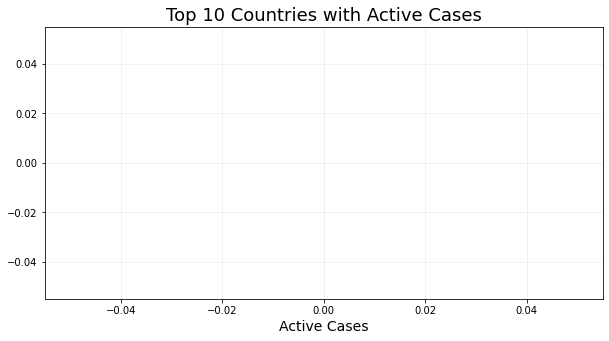

In [35]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot()

plt.barh(countries_overview.sort_values('Active')['Active'].index[-10:], 
         countries_overview.sort_values('Active')['Active'].values[-10:], color='Green')
plt.xlabel('Active Cases', fontsize=14)
plt.title('Top 10 Countries with Active Cases', fontsize=18)
plt.grid(alpha=0.2)
# plt.savefig('Images/top10active.png')
plt.show()

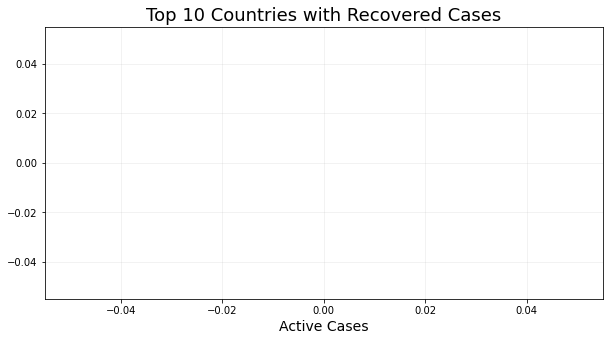

In [36]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot()

plt.barh(countries_overview.sort_values('Recovered')['Recovered'].index[-10:], 
         countries_overview.sort_values('Recovered')['Recovered'].values[-10:], color='Yellow')
plt.xlabel('Active Cases', fontsize=14)
plt.title('Top 10 Countries with Recovered Cases', fontsize=18)
plt.grid(alpha=0.2)
# plt.savefig('Images/top10recovered.png')
plt.show()

## Calendar Heatmap

In [37]:
global_data['Last_Update'] =  pd.to_datetime(global_data['Last_Update'], format='%m/%d/%Y')

global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124605 entries, 0 to 124604
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Last_Update     124605 non-null  datetime64[ns]
 1   Country_Region  124605 non-null  object        
 2   Confirmed       124605 non-null  int64         
 3   Deaths          124605 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


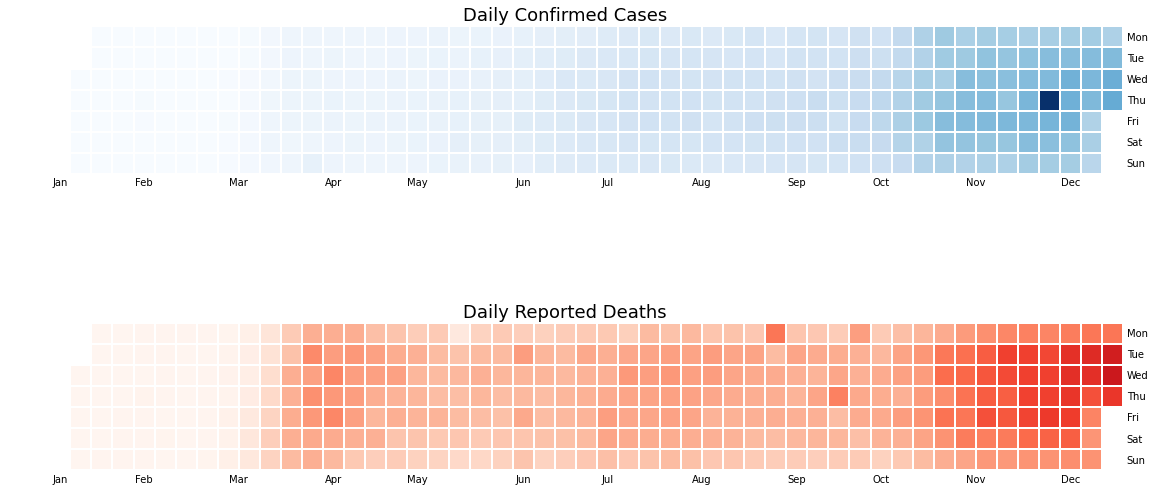

In [38]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,1,1)

calmap.yearplot(global_data.groupby(['Last_Update'])['Confirmed'].sum().diff(), 
                 fillcolor='white', cmap='Blues', linewidth=0.3, year=2020)
plt.title('Daily Confirmed Cases', fontsize=18)

fig.add_subplot(2,1,2)

calmap.yearplot(global_data.groupby(['Last_Update'])['Deaths'].sum().diff(), 
                 fillcolor='white', cmap='Reds', linewidth=0.3, year=2020)
plt.title('Daily Reported Deaths', fontsize=18)

plt.savefig('Images/global_calendar_heat.png')
plt.show()

# Map Visualizations

## Global Map

In [39]:
#Used foilum to create base map

global_map = folium.Map(location=[10,0], tiles='Stamen Terrain', zoom_start=2)

# Used for loop and Circle to show the magnitude of confirmed cases. Also calculated mortality rate. 

for i in range(0, len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
                  tooltip = "<h5 style= 'text-align:center;font-weight: bold'>" +
                confirmed_df.iloc[i]['Country'] + "</h5>" + "<div style='text-align:center;'>"+str(np.nan_to_num(confirmed_df.iloc[i]['State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(death_df.iloc[i, -1])+"</li>" + 
        "<li>Mortality Rate:   "+str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        , radius=(int((np.log(confirmed_df.iloc[i,-1] + 1.00001)))+ 0.2) * 50000,
        color='red',
        fill_color = 'red',
        fill_opacity = 0.6, 
        fill=True).add_to(global_map)
    
global_map    

In [40]:


scatter_map = px.scatter_geo(global_data, locations ='Country_Region',
                            locationmode='country names',
    color=np.power(global_data['Confirmed'], 0.3) -2,
    size = np.power(global_data['Confirmed'] + 1 , 0.3)-1,
    hover_name='Country_Region',
    hover_data = ['Confirmed'], 
    range_color = [0, max(np.power(global_data['Confirmed'],0.1))],
    projection='natural earth',
    animation_frame='Last_Update',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Progression of COVID-19')

scatter_map.update_coloraxes(colorscale='hot')
scatter_map.update(layout_coloraxis_showscale=False)
# scatter_map.update_layout(width= 800, height=800)
scatter_map.show()
    

KeyError: Timestamp('2020-01-22 00:00:00')